In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
from datetime import datetime

In [2]:
df = pd.read_excel(r"C:\Users\senay\Desktop\ruhid shihkerimov\superstore_sales.xlsx")
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [3]:
df.shape

(51290, 21)

In [4]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [6]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

#### Product Sales

In [7]:
df.groupby('product_name')['sales'].sum()

product_name
"While you Were Out" Message Book, One Form per Page                                                     25.228
#10 Gummed Flap White Envelopes, 100/Box                                                                 41.300
#10 Self-Seal White Envelopes                                                                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 286.672
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     477.660
iOttie HLCRIO102 Car Mount                                                                              215.892
iOttie XL Car Mount                                                                        

In [12]:
# product_names_sales = pd.DataFrame(df.groupby('product_name')['sales'].sum(numeric = True))
product_names_sales = pd.DataFrame(df.groupby('product_name')['sales'].sum())[:5]
product_names_sales.sort_values(by=['sales'], ascending = False ,inplace=True)
product_names_sales.head(5)

,sales
product_name,
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
#10 Self-Seal White Envelopes,108.682
"#10 Gummed Flap White Envelopes, 100/Box",41.300
"""While you Were Out"" Message Book, One Form per Page",25.228


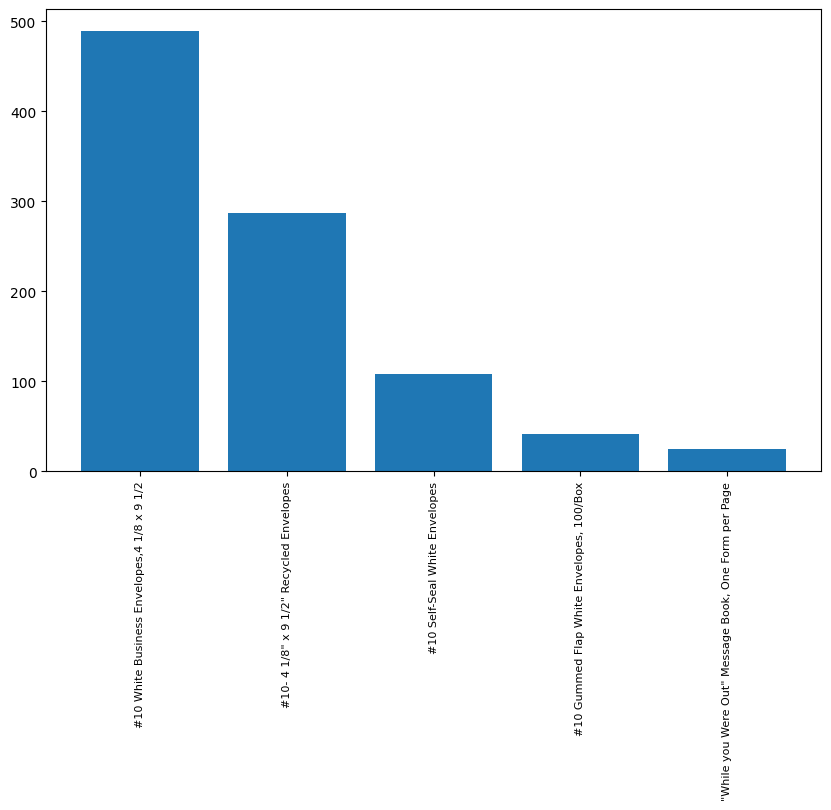

In [19]:
plt.figure(figsize=(10,6))
plt.bar(product_names_sales.index,product_names_sales['sales'])
plt.xticks(rotation = 'vertical',size=8)
plt.show()

### Profit by Segment

In [21]:
# product_names_sales = pd.DataFrame(df.groupby('segment')['profit'].sum(numeric = True))
product_names_profit = pd.DataFrame(df.groupby('segment')['profit'].sum())[:5]
product_names_profit.sort_values(by=['profit'], ascending = False ,inplace=True)
product_names_profit.head(5)

,profit
segment,
Consumer,749239.78206
Corporate,442785.85866
Home Office,277009.18056


<AxesSubplot: xlabel='segment', ylabel='profit'>

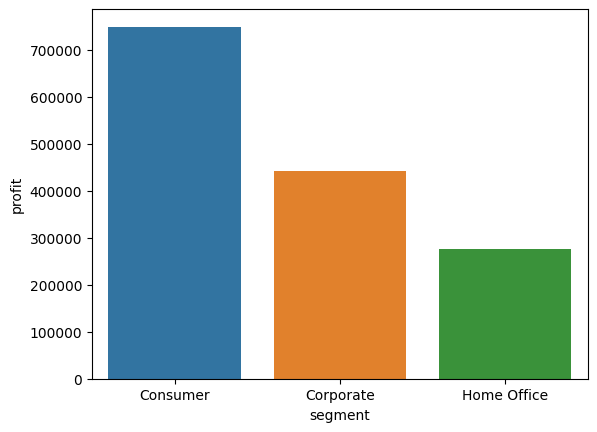

In [24]:
sns.barplot(data = product_names_profit.reset_index(), x='segment',y='profit')

In [25]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

### Shipmode by Category

In [27]:
pd.DataFrame(df.groupby(['category', 'sub_category'])['quantity'].sum())

quantity
category        sub_category          
Furniture       Bookcases         8310
                Chairs           12336
                Furnishings      11225
                Tables            3083
Office Supplies Appliances        6078
                Art              16301
                Binders          21429
                Envelopes         8380
                Fasteners         8390
                Labels            9322
                Paper            12822
                Storage          16917
                Supplies          8543
Technology      Accessories      10946
                Copiers           7454
                Machines          4906
                Phones           11870

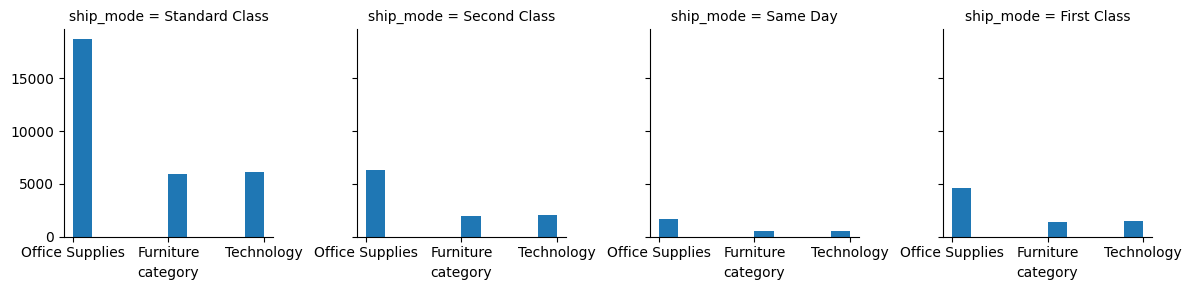

In [29]:
category_name = sns.FacetGrid(df, col='ship_mode')
category_name.map(plt.hist, 'category')

### Month & Year Sales

In [33]:
#df['month'] = df['order_date'].dt.month
month = df['order_date'].astype(str)
month = month.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df['month'] = month.map(lambda x: x.month)
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011,1
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011,1
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,12


In [40]:
df.groupby(['year', 'month'])['sales'].sum().round(2)

year  month
2011  1         98898.49
      2         91152.16
      3        145729.37
      4        116915.76
      5        146747.84
      6        215207.38
      7        115510.42
      8        207581.49
      9        290214.46
      10       199071.26
      11       298496.54
      12       333925.73
2012  1        135780.72
      2        100510.22
      3        163076.77
      4        161052.27
      5        208364.89
      6        256175.70
      7        145236.79
      8        303142.94
      9        289389.17
      10       252939.85
      11       323512.42
      12       338256.97
2013  1        199185.91
      2        167239.65
      3        198594.03
      4        177821.32
      5        260498.56
      6        396519.61
      7        229928.95
      8        326488.79
      9        376619.25
      10       293406.64
      11       373989.36
      12       405454.38
2014  1        241268.56
      2        184837.36
      3        263100.77
      4      

In [45]:
date = df.groupby(['year', 'month'])[['sales','quantity','discount','profit','shipping_cost']].sum()
date.head()

sales  quantity  discount       profit  shipping_cost
year month                                                              
2011 1       98898.48886      1463    68.758   8321.80096     10544.7880
     2       91152.15698      1224    52.252  12417.90698     10681.1630
     3      145729.36736      1836    74.212  15303.56826     13096.1855
     4      116915.76418      2020    80.782  12902.32438     12954.5200
     5      146747.83610      2013    82.382  12183.82870     16443.2060

<AxesSubplot: xlabel='year', ylabel='sales'>

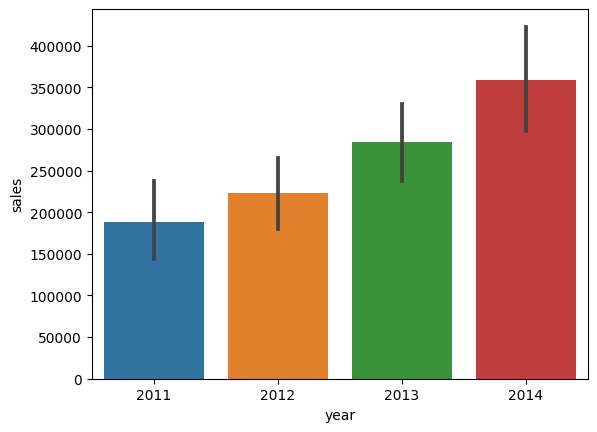

In [48]:
sns.barplot(data=date.reset_index() ,x='year', y= 'sales')

### Top Country by sales

In [58]:
countries = pd.DataFrame(df.groupby('country')['sales'].sum(numeric_only=True))
countries.sort_values('sales',inplace=True, ascending = False)
top_10 = countries.head(10)
top_10

,sales
country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


Text(0.5, 1.0, 'Top 10 Countries by Sales')

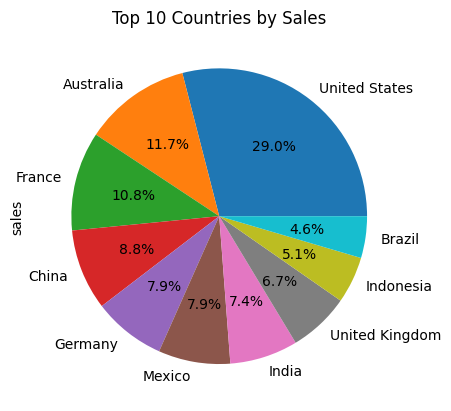

In [63]:
top_10['sales'].plot(kind= 'pie', autopct= '%1.1f%%')
plt.title('Top 10 Countries by Sales')

### Countries & Shipping Cost

In [81]:
shipping_country = df.groupby('country').agg({'shipping_cost': 'max'}).sort_values(by = 'shipping_cost', ascending=False).head(10)
#pd.DataFrame(df.groupby('country')['shipping_cost'].agg(['max'])).sort_values(by = 'max', ascending=False)
shipping_country

,shipping_cost
country,
United States,933.57
Australia,923.63
Germany,910.16
Senegal,903.04
New Zealand,894.77
Afghanistan,835.57
Saudi Arabia,832.41
Brazil,810.25
China,804.54


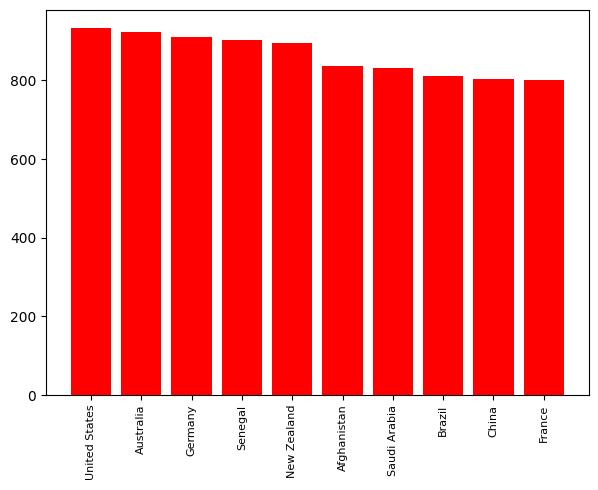

In [92]:
plt.figure(figsize=(7,5))
plt.bar(shipping_country.index, shipping_country['shipping_cost'], color='r')
plt.xticks(rotation = 'vertical', size=8)
plt.show()